In [85]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install yahoofinancials

Note: you may need to restart the kernel to use updated packages.


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials

In [88]:
start='2013-1-1'
end='2022-12-31'

df = yf.download('TSLA', start, end, progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000


In [89]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300


In [90]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
1,2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2,2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
3,2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
4,2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000


In [91]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,2.333333,2.363333,2.314000,2.357333,17922000
1,2.345333,2.363333,2.316667,2.318000,11130000
2,2.320000,2.320000,2.261333,2.293333,10110000
3,2.320000,2.320000,2.260000,2.289333,6630000
4,2.300000,2.300000,2.207333,2.245333,19260000


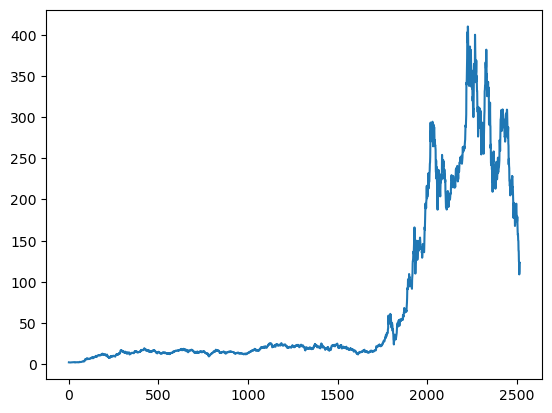

In [92]:
plt.plot(df.Close)

In [93]:
df

,Open,High,Low,Close,Volume
0,2.333333,2.363333,2.314000,2.357333,17922000
1,2.345333,2.363333,2.316667,2.318000,11130000
2,2.320000,2.320000,2.261333,2.293333,10110000
3,2.320000,2.320000,2.260000,2.289333,6630000
4,2.300000,2.300000,2.207333,2.245333,19260000
...,...,...,...,...,...
2513,126.370003,128.619995,121.019997,123.150002,166989700
2514,117.500000,119.669998,108.760002,109.099998,208643400
2515,110.349998,116.269997,108.239998,112.709999,221070500
2516,120.389999,123.570000,117.500000,121.820000,221923300


In [94]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    234.019467
2514    232.024134
2515    230.269534
2516    228.583501
2517    226.981967
Name: Close, Length: 2518, dtype: float64

In [95]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    255.097317
2514    254.317234
2515    253.603501
2516    252.876117
2517    252.091634
Name: Close, Length: 2518, dtype: float64

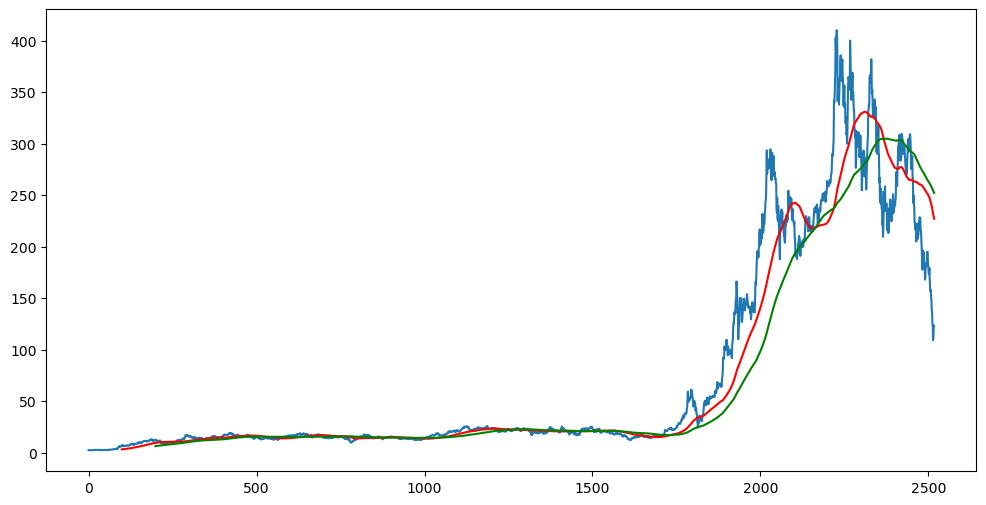

In [96]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [97]:
df.shape

(2518, 5)

# Splitting

In [98]:
df_training = df['Close'][0:int(len(df)*0.70)]
df_testing = df['Close'][int(len(df)*0.70): int(len(df))]
print(df_training.shape)
print(df_testing.shape)

(1762,)
(756,)


In [99]:
df_training.head()

0    2.357333
1    2.318000
2    2.293333
3    2.289333
4    2.245333
Name: Close, dtype: float64

In [100]:
df_testing.head()

1762    28.684000
1763    29.534000
1764    30.102667
1765    31.270666
1766    32.809334
Name: Close, dtype: float64

In [101]:
df_training = pd.DataFrame(df_training, columns=['Close'])
df_training.head()

,Close
0,2.357333
1,2.318000
2,2.293333
3,2.289333
4,2.245333


In [102]:
df_testing = pd.DataFrame(df_testing, columns=['Close'])
df_testing.head()

,Close
1762,28.684000
1763,29.534000
1764,30.102667
1765,31.270666
1766,32.809334


In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [104]:
df_training_array = scaler.fit_transform(df_training)
df_training_array

array([[0.0061553 ],
       [0.00467302],
       [0.00374343],
       ...,
       [0.99859303],
       [0.95919907],
       [0.96831893]])

In [105]:
df_training_array.shape

(1762, 1)

In [106]:
x_train =[]
y_train =[] 

for i in range(100, df_training_array.shape[0]):
    x_train.append(df_training_array[i-100: i])
    y_train.append(df_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train),

In [107]:
x_train.shape

(1662, 100, 1)

# ML modeling

In [108]:
import tensorflow as tf
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [111]:
model =Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [112]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_28 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_29 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_29 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_30 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_30 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_31 (LSTM)              (None, 120)             

In [113]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 23s 260ms/step - loss: 0.0555
Epoch 2/50
52/52 [==============================] - 15s 282ms/step - loss: 0.0123
Epoch 3/50
52/52 [==============================] - 15s 296ms/step - loss: 0.0123
Epoch 4/50
52/52 [==============================] - 16s 302ms/step - loss: 0.0108
Epoch 5/50
52/52 [==============================] - 14s 268ms/step - loss: 0.0117
Epoch 6/50
52/52 [==============================] - 16s 315ms/step - loss: 0.0091
Epoch 7/50
52/52 [==============================] - 15s 294ms/step - loss: 0.0095
Epoch 8/50
52/52 [==============================] - 15s 293ms/step - loss: 0.0088
Epoch 9/50
52/52 [==============================] - 14s 277ms/step - loss: 0.0087
Epoch 10/50
52/52 [==============================] - 14s 263ms/step - loss: 0.0083
Epoch 11/50
52/52 [==============================] - 14s 274ms/step - loss: 0.0078
Epoch 12/50
52/52 [==============================] - 14s 263ms/step - loss: 0.0076
Epoch 13/50
5

In [114]:
model.save('keras_model.h5')

In [115]:
df_testing.head()

,Close
1762,28.684000
1763,29.534000
1764,30.102667
1765,31.270666
1766,32.809334


In [117]:
past_100_days =df_training.tail(100)

In [118]:
final_df = past_100_days.append(df_testing, ignore_index=True)

C:\Users\91628\AppData\Local\Temp\ipykernel_10156\3144555251.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(df_testing, ignore_index=True)


In [119]:
final_df.head()

,Close
0,15.667333
1,15.267333
2,15.666667
3,14.641333
4,14.376000


In [120]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.97598427e-03],
       [2.96556954e-03],
       [3.97430278e-03],
       [1.38426795e-03],
       [7.14028340e-04],
       [1.43816010e-03],
       [2.59845194e-03],
       [2.43510120e-03],
       [1.58803721e-03],
       [1.81032941e-03],
       [0.00000000e+00],
       [6.06248841e-04],
       [4.51320027e-04],
       [7.05608819e-04],
       [1.73623281e-03],
       [2.39300119e-03],
       [2.29195971e-03],
       [1.56277624e-03],
       [3.06155930e-03],
       [2.70286122e-03],
       [3.43373101e-03],
       [4.06524082e-03],
       [6.01197370e-03],
       [5.80483663e-03],
       [5.69200782e-03],
       [5.28952343e-03],
       [5.62296053e-03],
       [5.40404336e-03],
       [5.92777367e-03],
       [4.92072193e-03],
       [5.02345212e-03],
       [1.98883529e-03],
       [2.91336610e-03],
       [5.24742823e-03],
       [5.17501313e-03],
       [4.96282676e-03],
       [5.60612631e-03],
       [5.34341799e-03],
       [3.64254717e-03],
       [3.37310565e-03],


In [121]:
input_data.shape

(856, 1)

In [124]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])    

In [125]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


# Making prediction

In [126]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 5s 76ms/step


In [127]:
y_predicted.shape

(756, 1)

In [128]:
y_test

array([0.0368566 , 0.03900373, 0.04044021, 0.04339062, 0.04727735,
       0.0454586 , 0.0449214 , 0.05278748, 0.05498682, 0.05171644,
       0.05087274, 0.05036922, 0.0565496 , 0.06031509, 0.06075967,
       0.05951685, 0.05837171, 0.05986712, 0.06223992, 0.07231377,
       0.07395738, 0.09575373, 0.11378291, 0.08812509, 0.09052651,
       0.09037663, 0.09428526, 0.0948073 , 0.09361333, 0.09979539,
       0.09912684, 0.10895649, 0.11889561, 0.11586268, 0.11613044,
       0.1048121 , 0.09910662, 0.09555164, 0.07874506, 0.07689095,
       0.08962725, 0.08994553, 0.09061745, 0.08641412, 0.08286756,
       0.06678848, 0.07307495, 0.07120568, 0.05879777, 0.05645193,
       0.03935064, 0.03684649, 0.02523008, 0.03641538, 0.03639686,
       0.03753526, 0.04944301, 0.0552108 , 0.05334321, 0.05101926,
       0.0489597 , 0.05264266, 0.04549565, 0.04093363, 0.04523463,
       0.05133585, 0.0562549 , 0.05682578, 0.06089439, 0.07402137,
       0.08394702, 0.08730497, 0.089895  , 0.09135674, 0.09008

In [129]:
y_predicted

array([[0.15937398],
       [0.15966877],
       [0.15993485],
       [0.16019535],
       [0.16047755],
       [0.16081333],
       [0.16120076],
       [0.16161485],
       [0.16207102],
       [0.16258928],
       [0.16314712],
       [0.163703  ],
       [0.16421819],
       [0.16470267],
       [0.16519201],
       [0.16570652],
       [0.16623642],
       [0.16675314],
       [0.16723856],
       [0.16769496],
       [0.16818213],
       [0.16874757],
       [0.16952321],
       [0.17068255],
       [0.17211525],
       [0.17365289],
       [0.17515434],
       [0.17654747],
       [0.17780143],
       [0.17889842],
       [0.17986912],
       [0.18074141],
       [0.18158816],
       [0.18251714],
       [0.18355866],
       [0.18468739],
       [0.18578476],
       [0.18671581],
       [0.1873846 ],
       [0.18767023],
       [0.18753053],
       [0.18706298],
       [0.18641296],
       [0.18571475],
       [0.1850374 ],
       [0.18439248],
       [0.18369007],
       [0.182

In [130]:
scaler.scale_

array([0.00252604])

In [131]:
scale_factor = 1/0.00252604
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

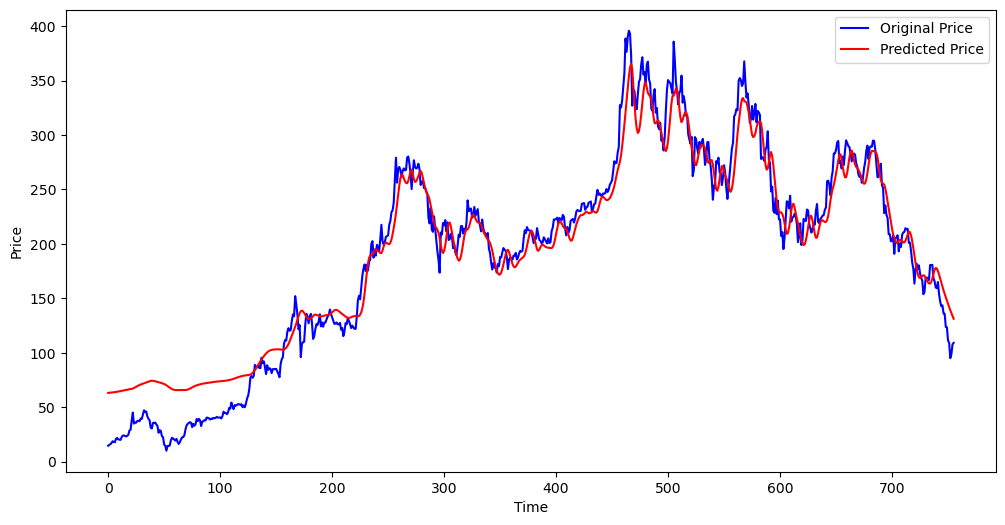

In [132]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()